In this notebook we are doing basic operations which are required when going for a machine learning model training,
* eg: data preprcessing,
* data cleaning,
* data analysis, and
* feature scaling and so on...



#**1. Uderstanding the Titanic Dataset**#

##1.1) Importing required libraries##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##1.2) Loading Data##

In [2]:
df = pd.read_csv('/content/train.csv')

##1.3) See how the dataset looks like ##

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##1.4) Datatype of each column ##

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##1.5) Is there any null value in the dataset, how many? ##

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##1.6) Stats about the data##

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##1.7) Check duplicates values ##

In [7]:
df.duplicated().sum()

0

##1.8) Correlation between cols ##

In [8]:
# df.corr()['Survived']
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['Survived']


,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


#**2. Univariate Analysis**#

##2.1) Categorical Data##

###a) Countplot###

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# sns.countplot(df['Sex'])

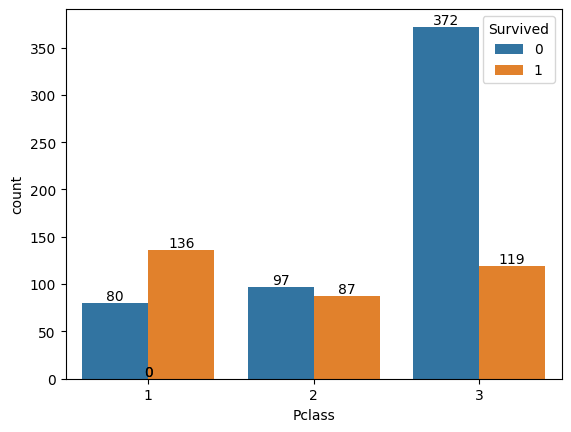

In [11]:
ax = sns.countplot(df, x="Pclass", hue="Survived",)
# Add counts on the bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()

###b) pie plot###

<Axes: ylabel='count'>

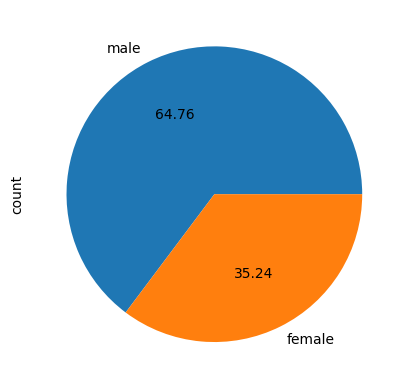

In [12]:
df['Sex'].value_counts().plot(kind='pie', autopct = '%.2f')

##2.2) Numeric Data##

###a) Histogram###

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

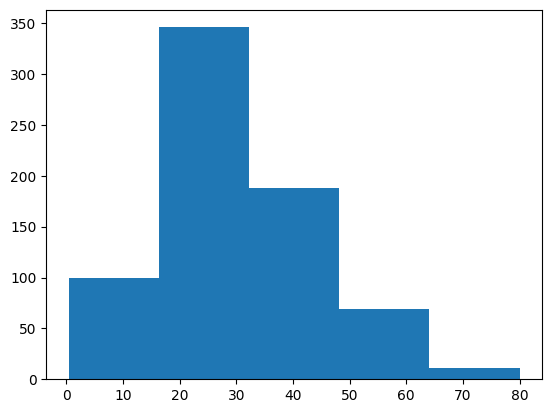

In [13]:
plt.hist(df['Age'], bins = 5)

###b) Distplot, going to be deprecated so better use histplot with 'kde = True' for the same result.###

<Axes: xlabel='Age', ylabel='Count'>

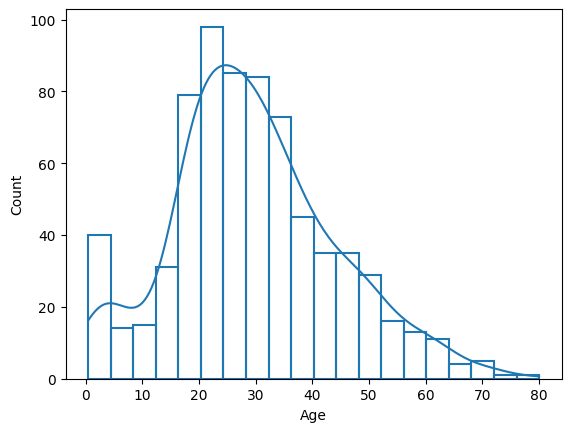

In [14]:
sns.histplot(df['Age'], kde=True, fill=False)

<ipython-input-15-f603447bb0e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True)


<Axes: xlabel='Age', ylabel='Density'>

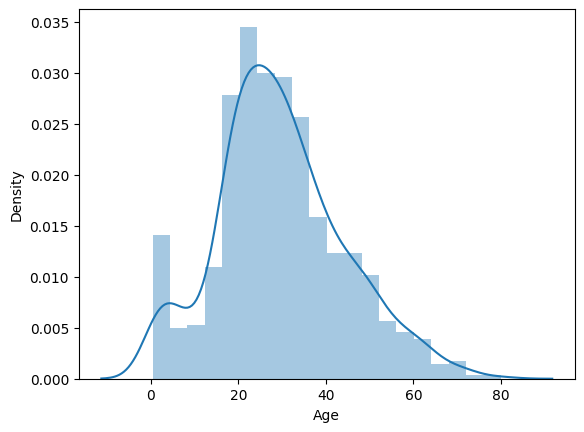

In [15]:
sns.distplot(df['Age'], kde=True)

###c) Boxplot###

<Axes: ylabel='Age'>

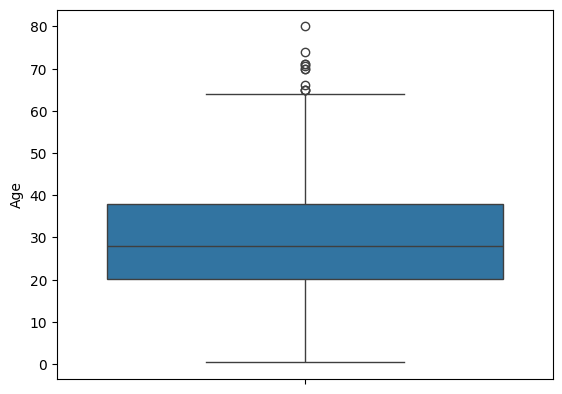

In [16]:
sns.boxplot(df['Age'])

In [17]:
print(f"{df['Age'].min()*12} months")

5.04 months


In [18]:
df['Age'].max()

80.0

#**3. Bivariate Analysis**#

loading different datasets from seaborn

In [19]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [20]:
tips = sns.load_dataset('tips')

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
flights = sns.load_dataset('flights')

In [24]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [26]:
iris = sns.load_dataset('iris')

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
titanic = pd.read_csv('/content/train.csv')

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##3.1 Scatterplot (Numerical - Numerical)##

<Axes: xlabel='total_bill', ylabel='tip'>

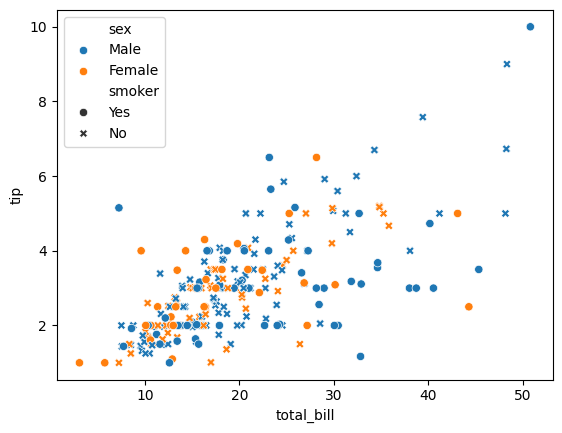

In [32]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', style = 'smoker')

##3.2 Bar Plot (Numerical - Categorical)##

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

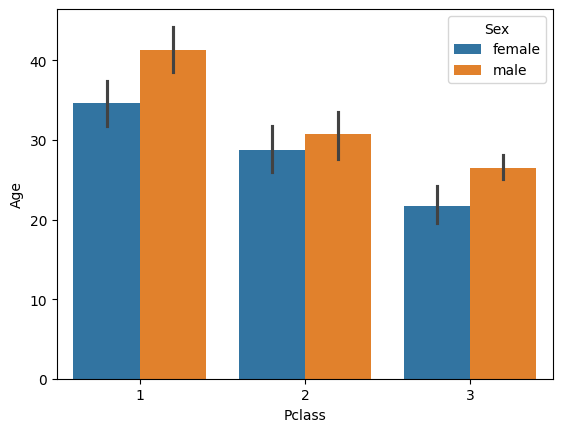

In [34]:
sns.barplot(x = titanic['Pclass'], y = titanic['Age'], hue = titanic['Sex'])

##3.3 Box Plot (Numerical - Categorical)##

<Axes: xlabel='Sex', ylabel='Age'>

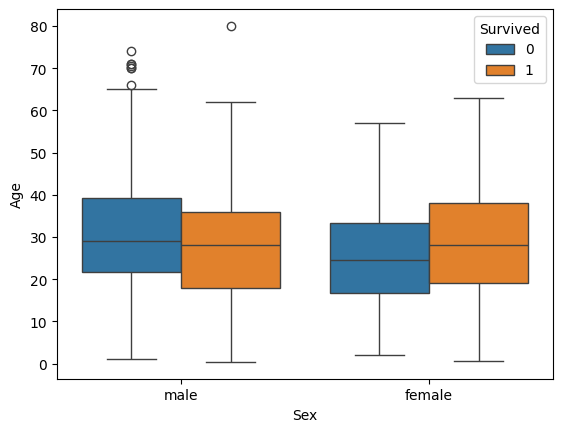

In [35]:
sns.boxplot(x = titanic['Sex'], y = titanic['Age'], hue = titanic['Survived'])

##3.4 Distplot (Numerical - Categorical)##

<ipython-input-36-c556d705ff0c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'], hist = False) # if u want to use legend and other features better go with histplot
<ipython-input-36-c556d705ff0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

<Axes: xlabel='Age', ylabel='Density'>

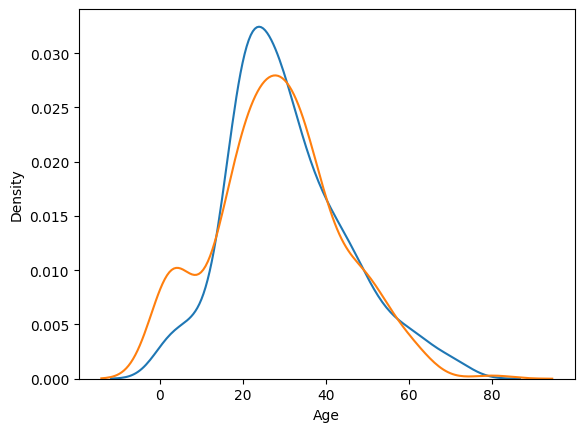

In [36]:
sns.distplot(titanic[titanic['Survived']==0]['Age'], hist = False) # if u want to use legend and other features better go with histplot
sns.distplot(titanic[titanic['Survived']==1]['Age'], hist = False)

##3.5 HeatMap (Categorical - Categorical)##

<Axes: xlabel='Survived', ylabel='Sex'>

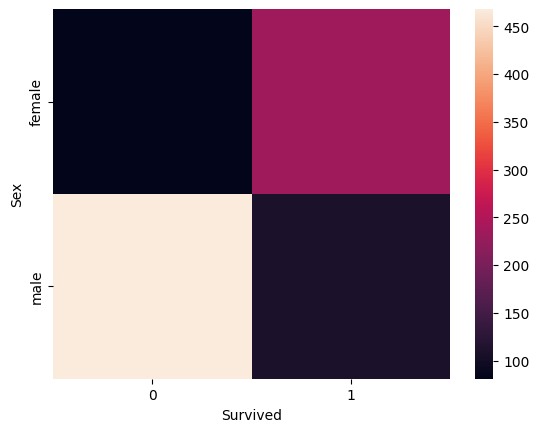

In [37]:
sns.heatmap(pd.crosstab(titanic['Sex'], titanic['Survived']))

##3.6  ClusterMap (Categorical - Categorical)##

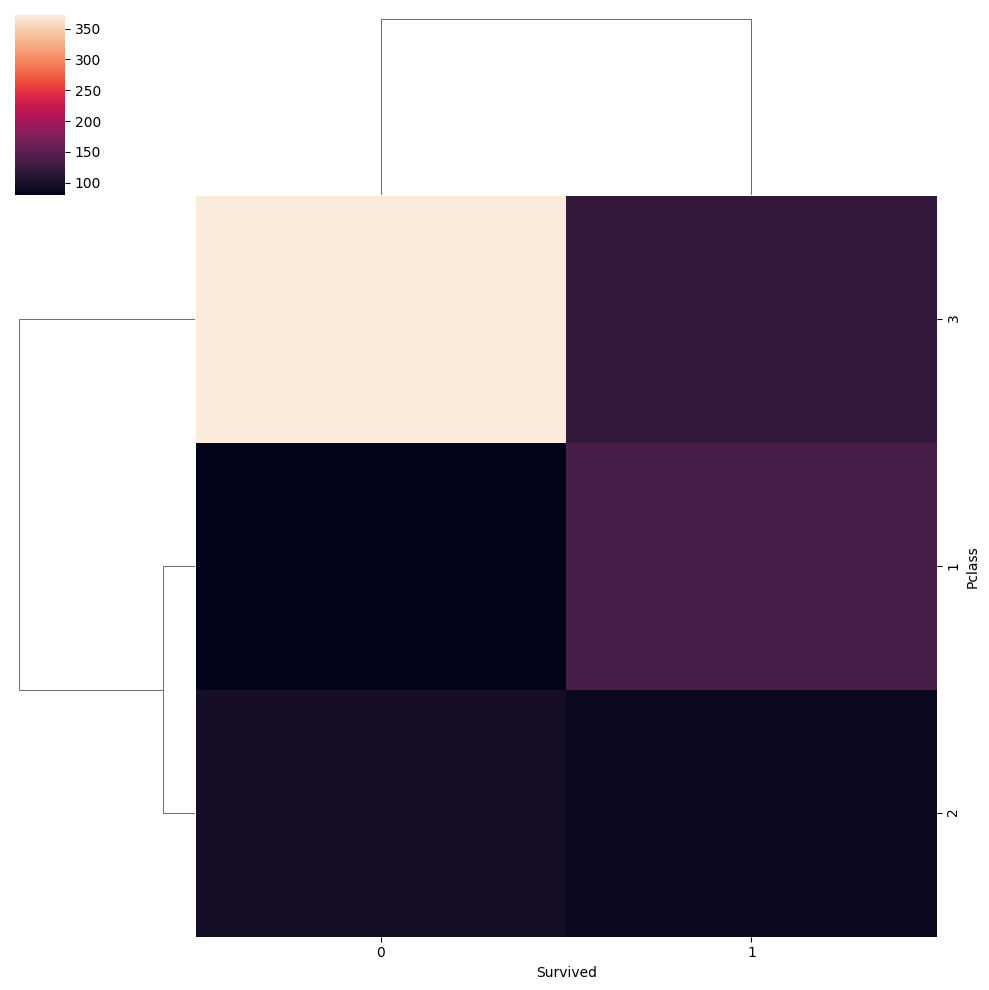

In [38]:
sns.clustermap(pd.crosstab(titanic['Pclass'], titanic['Survived']))

##3.7 Pairplot##

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


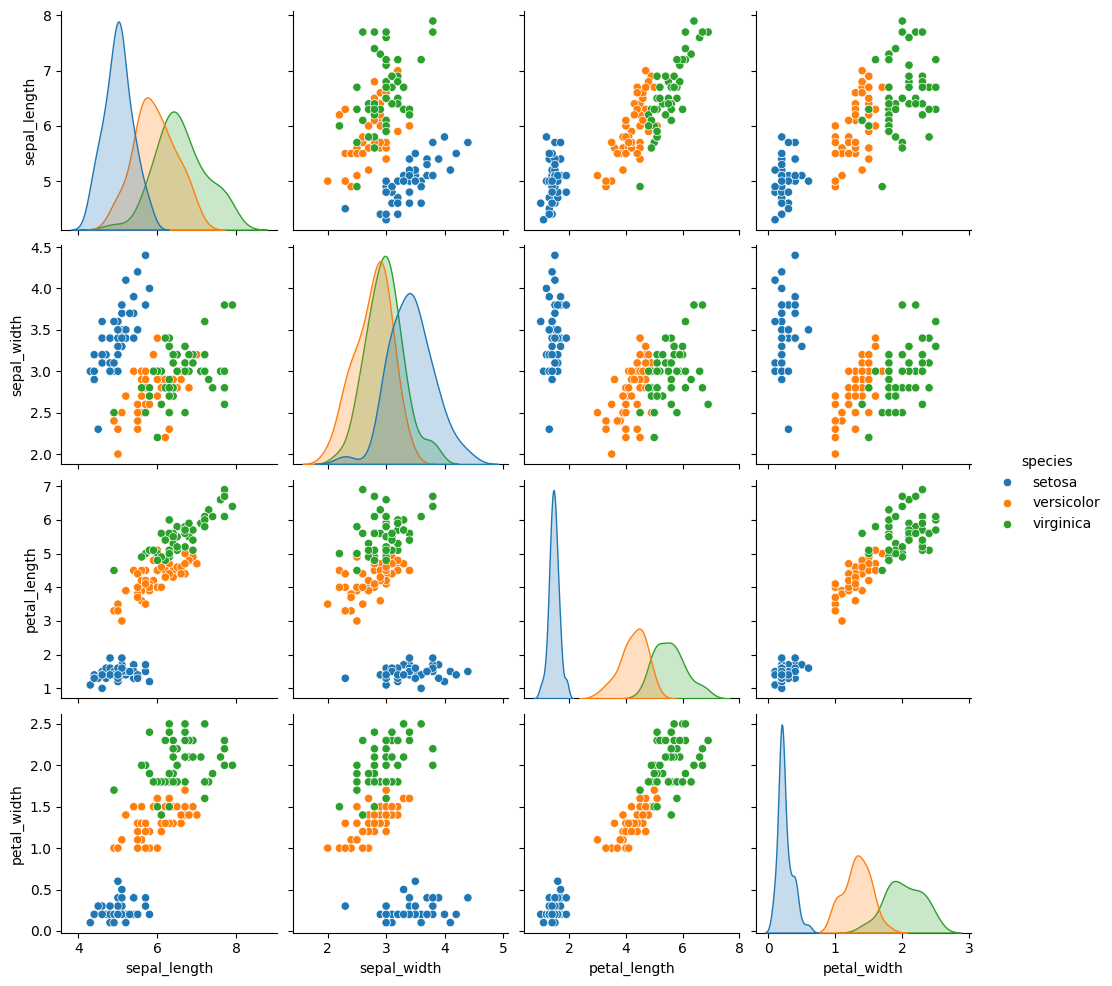

In [40]:
sns.pairplot(iris, hue = 'species')

##3.8 Lineplot (Numerical - Numerical)##

In [41]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [42]:
sum_pas = flights.groupby('year')['passengers'].sum().reset_index()


<Axes: xlabel='year', ylabel='passengers'>

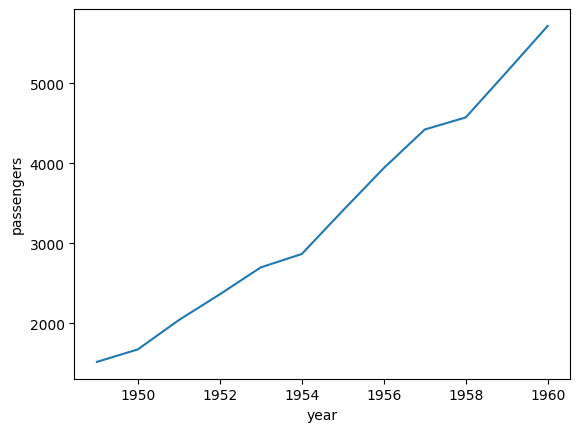

In [43]:
sns.lineplot(x = sum_pas['year'], y = sum_pas['passengers'])

<ipython-input-44-08387ae2d474>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))


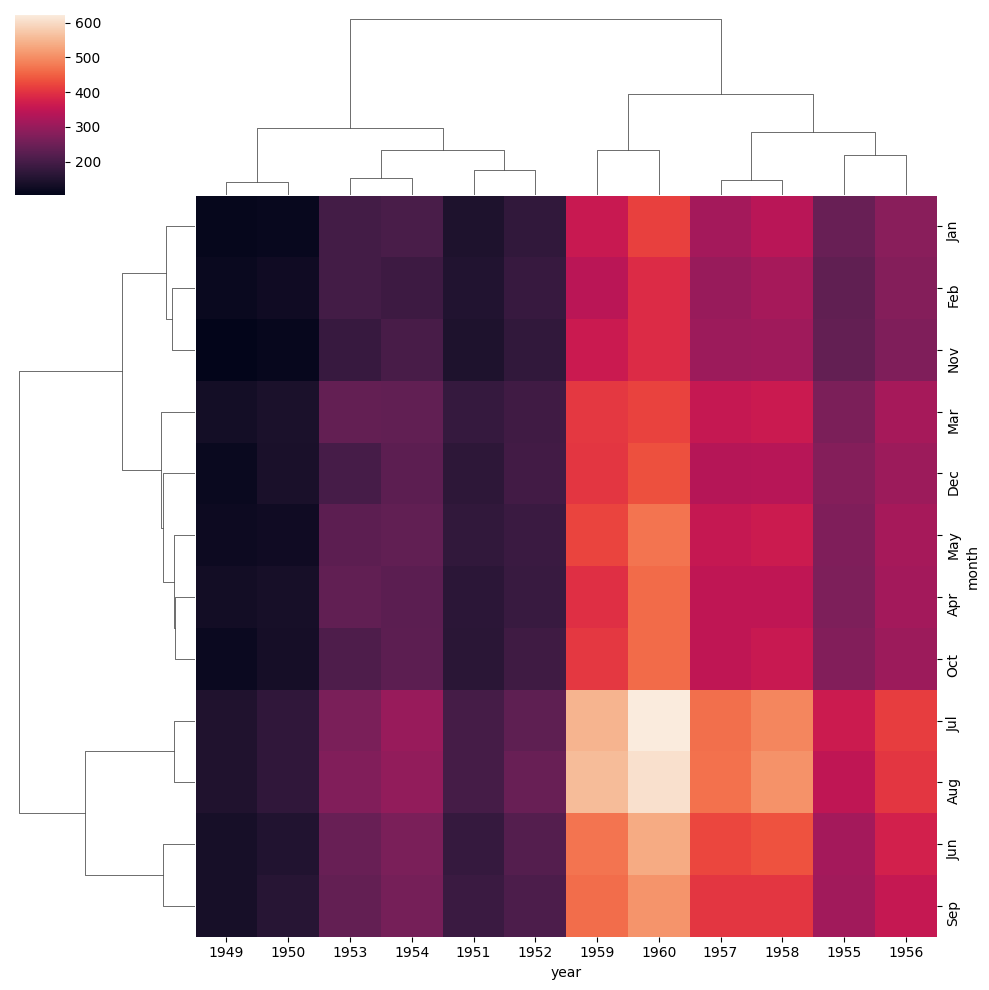

In [44]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))


#**Feature Scaling**#

Two types of feature Scaling:
1. Standardization or z-score Normlization
2. Normalization

Two types of Normalization:
1.  Min-Max Scaler
2.  Robust Scaler



##**Standardization**##

std(xᵢ) = (xᵢ - μ) / σ


it changes valuse to [-3,3].

**When to use Standardization?**

1.   When Features Have Different Units:

*   Different features may be measured in different scales (e.g., height in cm and weight in kg).
*   Standardization helps ensure that no feature dominates due to its scale.
     
2.   K-mean and K-NN

*   Algorithms like k-means clustering and k-nearest neighbors (KNN) are sensitive to the distances between data points.
*   Standardization ensures that all features contribute equally to distance calculations.

3.    When Using Gradient Descent Optimization:

*   Models like linear regression, logistic regression, and neural networks often use gradient descent.
*   Standardization helps in faster convergence of the algorithm, as it ensures that the cost function behaves more uniformly across features.

4.    Preparing Data for Principal Component Analysis (PCA):


*   PCA aims to reduce dimensionality while preserving as much variance as possible.
*   It is important to standardize the data so that features with larger variance do not dominate the results.


5.    Artificial Neural Networks (ANNs)





In [45]:
sal_df = pd.read_csv('/content/Social_Network_Ads.csv')

In [46]:
sal_df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
32,15573452,Female,21,16000,0
312,15733964,Female,38,50000,0
296,15673539,Male,42,73000,1
78,15667265,Female,28,87000,0
262,15672821,Female,55,125000,1


In [47]:
sal_df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Here as we can see, the YearsExperience ranges from 1 to 10, but salary range is from 30000 to 122391. So we can't compare these two values directly as the Salary values are very big and if we apply any algorithm, that calculates distance between points it will we very hard to determine the distances. So make them in a common range here we use Standardization.

In [48]:
sal_df = sal_df.iloc[:, 2:]

In [49]:
sal_df.sample(4)

,Age,EstimatedSalary,Purchased
211,52,150000,1
248,41,52000,0
156,46,59000,0
174,34,72000,0


###Train test split



In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sal_df.drop('Purchased', axis = 1), sal_df['Purchased'], test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [51]:
y_train.shape, y_test.shape

((280,), (120,))

###StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
sc.fit(X_train)

# transform train and test sets
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [53]:
# Check the scaled values, now both are in the range [-3,3]

In [54]:
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

In [55]:
X_train.dtypes

,0
Age,int64
EstimatedSalary,int64


In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [57]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [58]:
np.round(X_train.describe(), 2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [59]:
np.round(X_train_scaled.describe(), 2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


Here you can see, mean of std values is 0, and std deviation is 1 for both the columns.

###Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

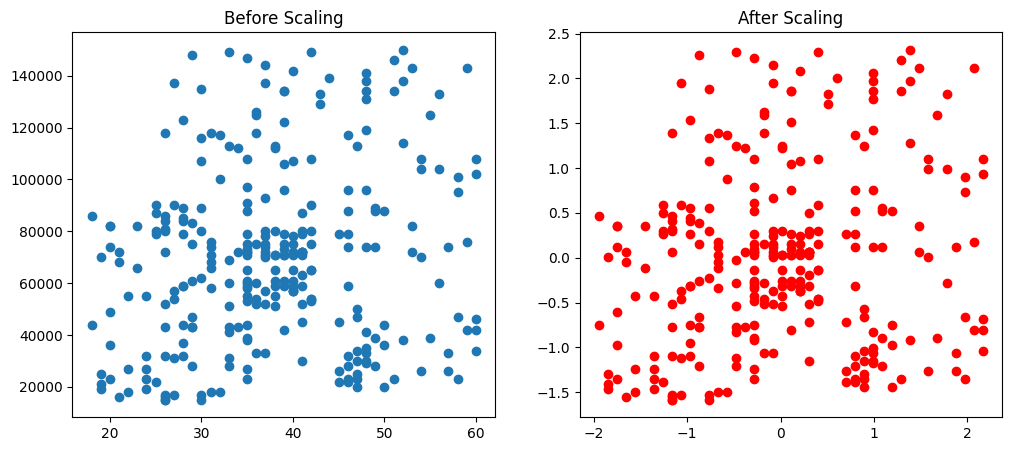

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

Above we can observe that there is not any changes in the data points.

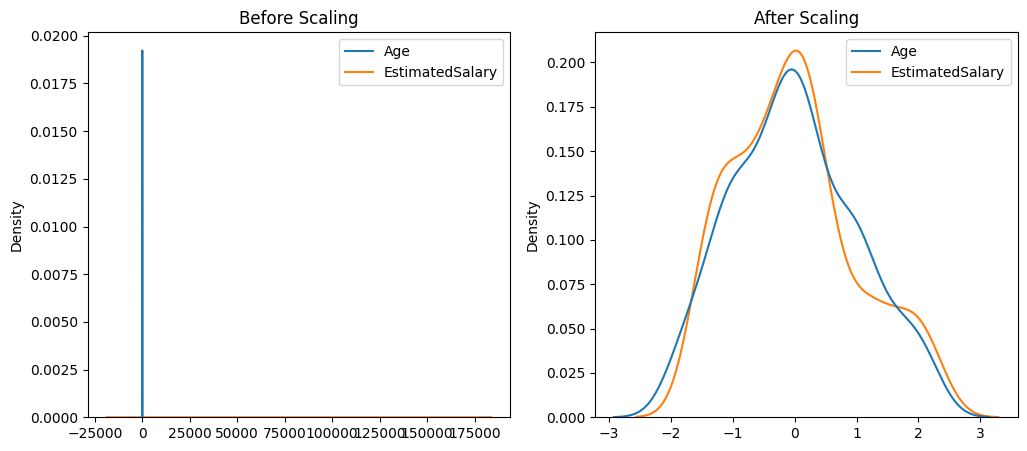

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax = ax1)
# sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled, ax = ax2)
# sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)
plt.show()

###Comparison of Distributions

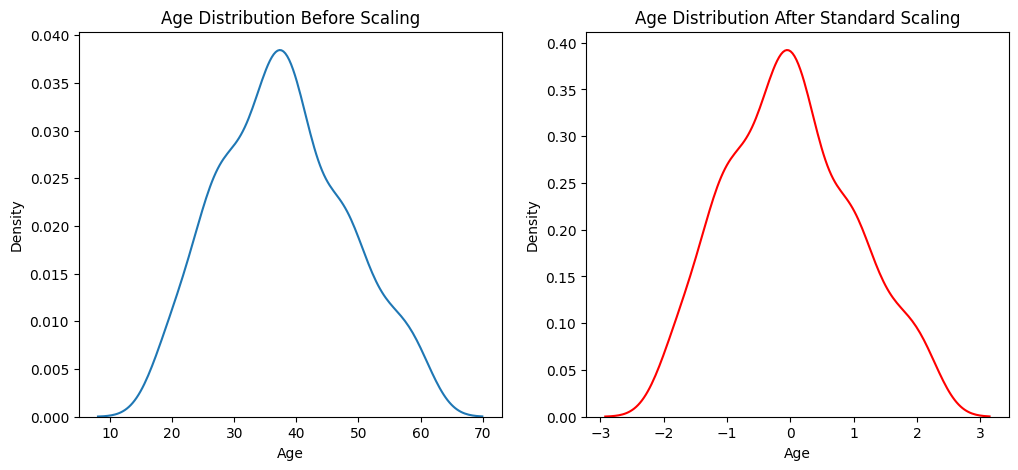

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color = 'red')
plt.show()

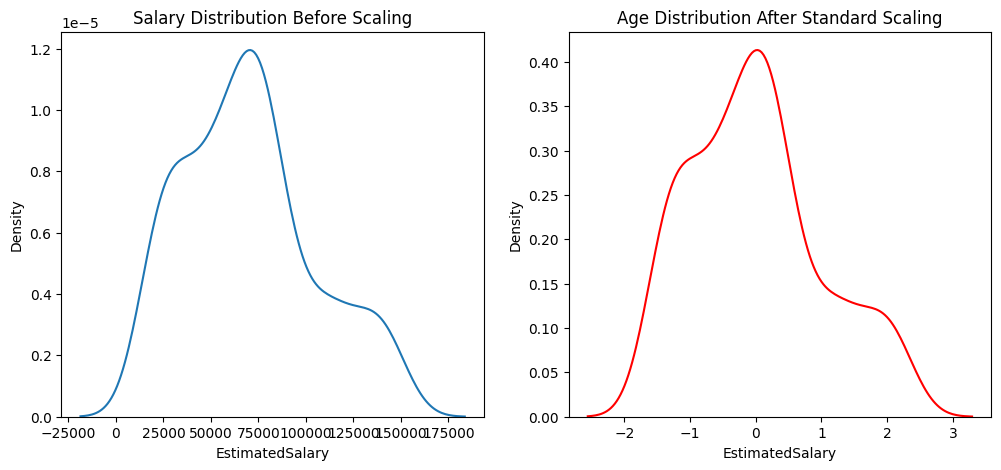

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color = 'red')
plt.show()

###**Why scaling is important?**
Let's apply algorithm on both the dataset, normal and scaled and check prediction accuracy.

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()



In [65]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [66]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [67]:
from sklearn.metrics import accuracy_score


In [68]:
print('Actual: ', accuracy_score(y_test, y_pred))
print('Scaled: ', accuracy_score(y_test, y_pred_scaled))

Actual:  0.875
Scaled:  0.8666666666666667


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [71]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [72]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [73]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.875


###Effect of Outlier

In [74]:
# sal_df = pd.concat(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

# New data you want to add
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Append new data to the existing dataset
sal_df = pd.concat([sal_df, new_data], ignore_index=True)


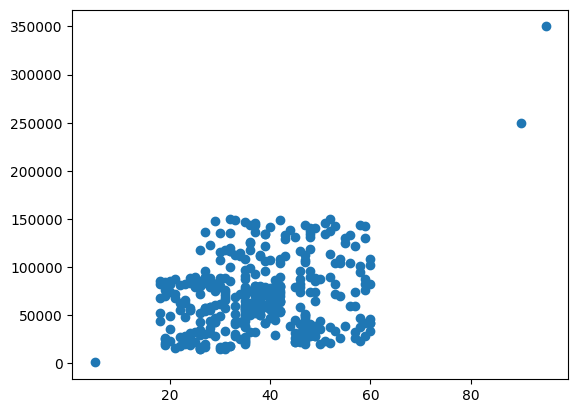

In [75]:
plt.scatter(sal_df['Age'], sal_df['EstimatedSalary'])


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sal_df.drop('Purchased', axis=1),
                                                    sal_df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

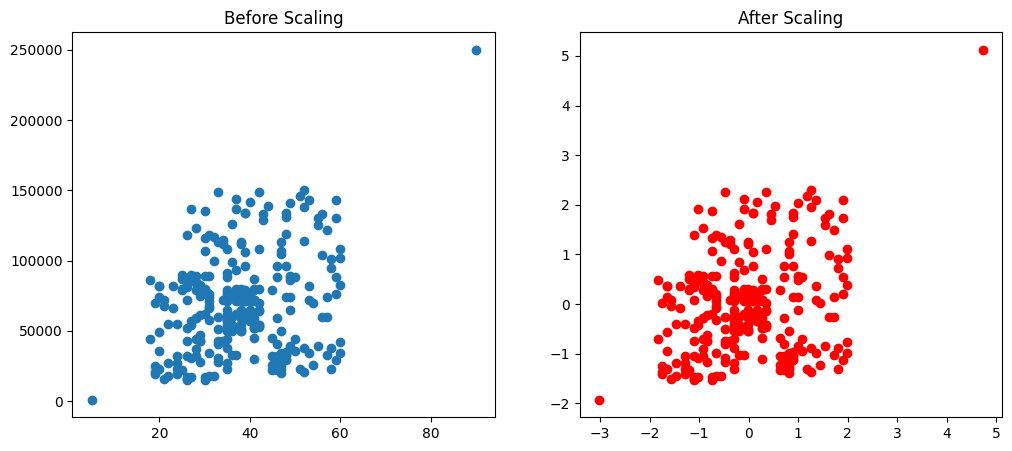

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

No efferct on outliers.

##**Normalization**##

Normalization scales the values of features to a [0, 1] range (or any other specified range) using the formula:

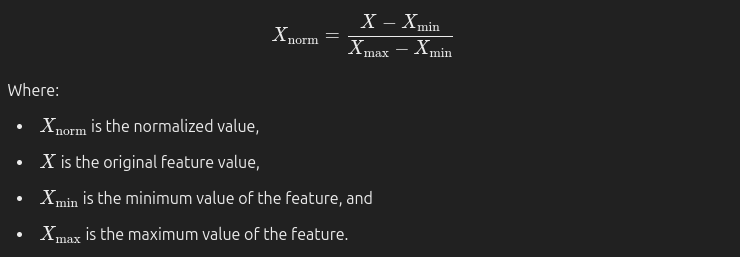



In [80]:
wine_df = pd.read_csv('/content/wine_data.csv')

In [81]:
wine_df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [82]:
wine_df = pd.read_csv('/content/wine_data.csv', header=None,usecols=[0,1,2])
wine_df.columns=['Class label', 'Alcohol', 'Malic acid']

In [90]:
wine_df.sample(5)

,Class label,Alcohol,Malic acid
171,3,12.77,2.39
111,2,12.52,2.43
107,2,12.72,1.75
123,2,13.05,5.80
55,1,13.56,1.73


<Axes: xlabel='Alcohol', ylabel='Density'>

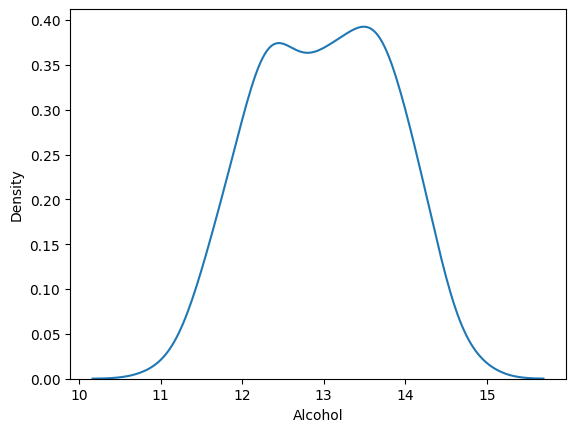

In [84]:
sns.kdeplot(wine_df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

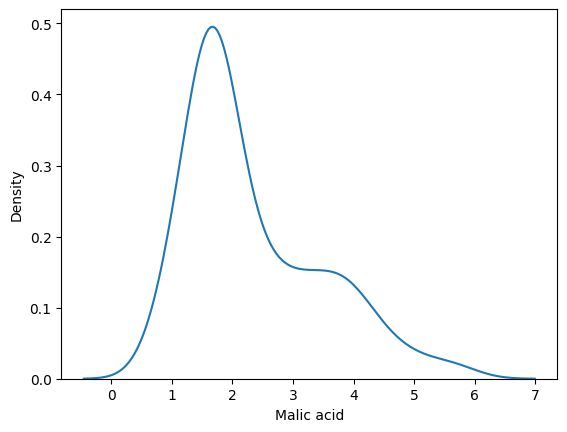

In [85]:
sns.kdeplot(wine_df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

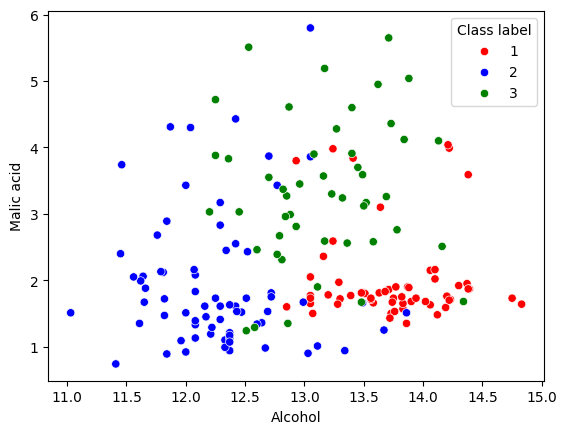

In [88]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x= wine_df['Alcohol'], y= wine_df['Malic acid'],hue=wine_df['Class label'],palette=color_dict)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('Class label', axis = 1),
                                                    wine_df['Class label'], test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

Use MinMaxScaler to normalise values

In [93]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [94]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [96]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [97]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


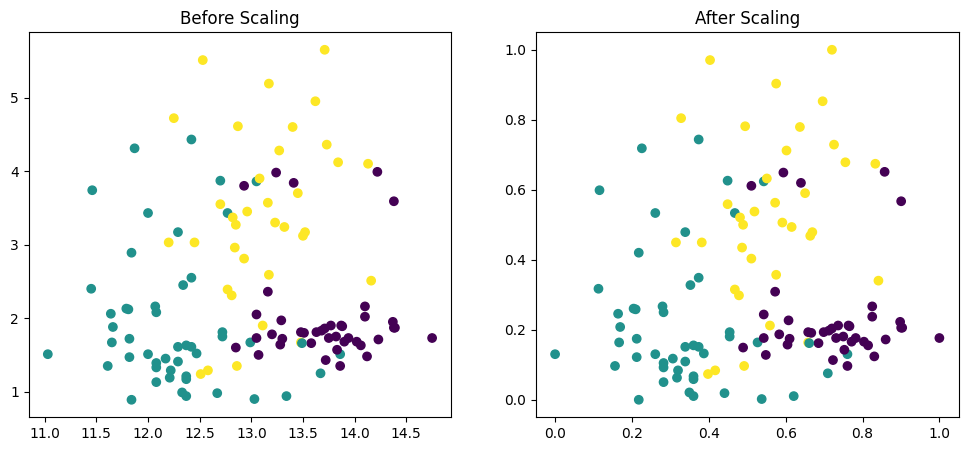

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
plt.show()

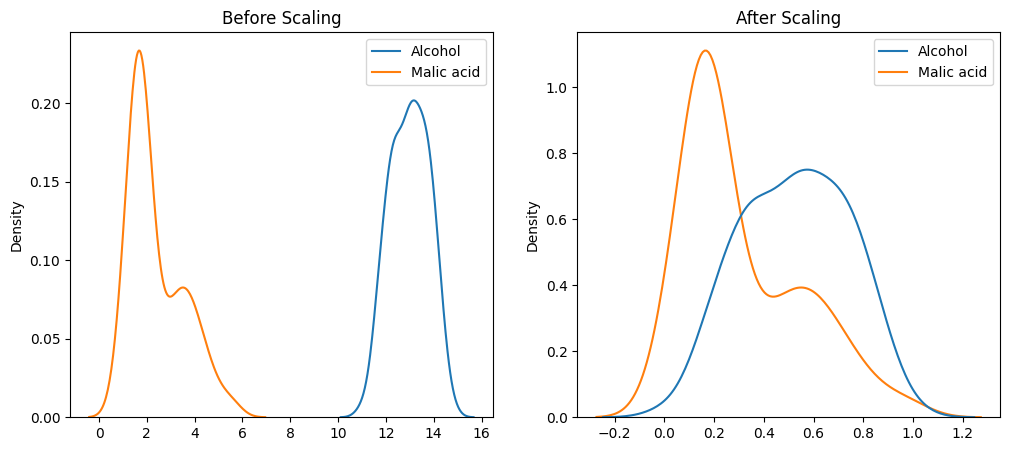

In [101]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax = ax1)
# sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled, ax = ax2)
# sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)
plt.show()

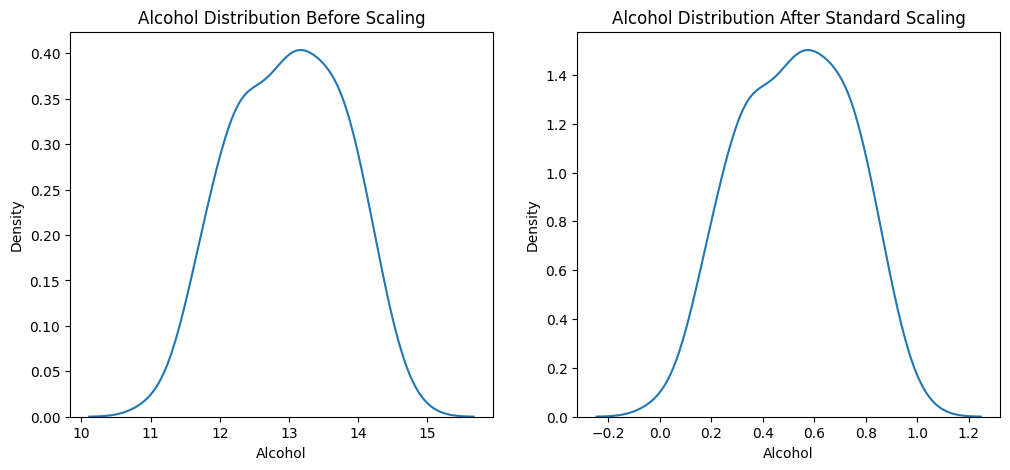

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

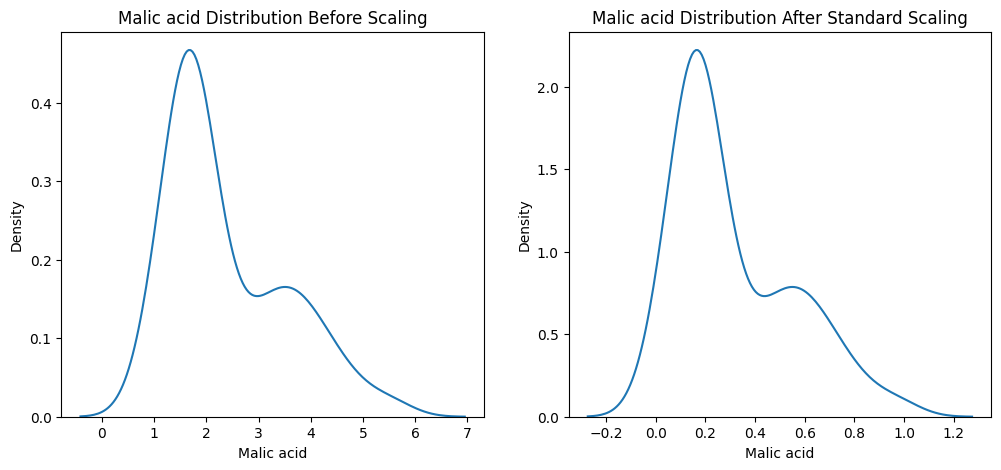

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

##**Ordinal Encoding**

Ordinal encoding is a technique used in machine learning to convert categorical data into numerical values, specifically when the categories have a clear, meaningful order or ranking. In ordinal encoding, each unique category is assigned an integer based on its order.



In [104]:
customer_df = pd.read_csv('/content/customer.csv')

In [105]:
customer_df.sample(5)

,age,gender,review,education,purchased
16,59,Male,Poor,UG,Yes
31,22,Female,Poor,School,Yes
18,19,Male,Good,School,No
7,60,Female,Poor,School,Yes
49,25,Female,Good,UG,No


In [108]:
customer_df['education'].unique()

array(['School', 'UG', 'PG'], dtype=object)

In [109]:
customer_df['review'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In this dataset two features 'review' and 'education' different order or ranking e.g. 'Average', 'poor', 'good'..
So we can apply Ordinal encoding here.

In [110]:
customer_df = customer_df.iloc[:, 2:]

In [111]:
customer_df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(customer_df.iloc[:, 0:2],
                                                    customer_df.iloc[:,-1], test_size=0.2)

In [115]:
X_train.head()

,review,education
6,Good,School
45,Poor,PG
36,Good,UG
34,Average,School
49,Good,UG


In [116]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [117]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [118]:
X_train = oe.transform(X_train)

In [119]:
X_train

array([[2., 0.],
       [0., 2.],
       [2., 1.],
       [1., 0.],
       [2., 1.],
       [0., 2.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [2., 2.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 2.],
       [2., 2.],
       [1., 2.],
       [1., 1.],
       [2., 1.],
       [1., 2.],
       [1., 1.],
       [0., 0.],
       [2., 2.],
       [0., 1.],
       [1., 1.],
       [0., 2.],
       [0., 0.],
       [2., 1.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [0., 2.],
       [2., 0.],
       [1., 0.],
       [0., 2.],
       [0., 2.],
       [2., 2.],
       [2., 1.]])

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [121]:
y_train.head()

,purchased
6,No
45,Yes
36,Yes
34,No
49,No


In [122]:
le.fit(y_train)

LabelEncoder()

In [124]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [125]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [126]:
y_train

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [127]:
y_test

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

##**One Hot Encoding**

*   One-hot encoding is a technique used to convert categorical variables into a binary (0 or 1) format so that machine learning algorithms can process them.
*   It is particularly useful when the categorical variable has no natural order among its categories, meaning the categories are nominal.

**Key Considerations:**



*   Avoid Redundancy: To prevent collinearity, especially in models like regression, you can drop one of the columns (called the "dummy variable trap").
  * This is because knowing the values of all but one of the categories allows you to infer the last category.
*   Algorithms Sensitivity: One-hot encoding is particularly suitable for algorithms like linear regression, logistic regression, k-nearest neighbors (KNN), and neural networks, which can be sensitive to the scale of input features.




In [128]:
car_df = pd.read_csv('/content/cars.csv')

In [129]:
car_df.sample(5)

,brand,km_driven,fuel,owner,selling_price
2773,Maruti,80000,Petrol,Second Owner,240000
4931,Tata,70000,Diesel,Third Owner,300000
1710,Lexus,20000,Petrol,First Owner,5150000
2739,Honda,25000,Diesel,First Owner,600000
5677,Tata,80000,Diesel,Second Owner,70000


In [133]:
# car_df['brand'].unique()

In [131]:
car_df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [132]:
car_df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

###1. OneHotEncoding using Pandas


In [134]:
pd.get_dummies(car_df,columns=['fuel','owner']
               )

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


###2. K-1 One Hot Encoding

In [169]:
pd.get_dummies(car_df, columns=['fuel','owner'],drop_first=True, dtype = int)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


###3. OneHotEncoding using Sklearn

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(car_df.iloc[:,0:4],
                                                    car_df.iloc[:,-1],test_size=0.2,random_state=0)


In [159]:
from sklearn.preprocessing import OneHotEncoder

In [160]:
ohe = OneHotEncoder(drop='first', sparse_output=False,dtype=np.int32)

In [161]:
from re import X
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])
print(X_train_new.shape)
X_train_new

(6502, 7)


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [162]:
X_test_new = ohe.transform(X_test[['fuel','owner']])
print(X_test_new.shape)
X_test_new

(1626, 7)


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=int32)

In [163]:
d1 = np.hstack((X_train[['brand','km_driven']].values,X_train_new))
d1

array([['Hyundai', 60000, 0, ..., 0, 0, 0],
       ['Tata', 150000, 1, ..., 0, 0, 1],
       ['Hyundai', 110000, 1, ..., 1, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]], dtype=object)

In [164]:
d1.shape

(6502, 9)

###4. OneHotEncoding with Top Categories


In [153]:
counts = car_df['brand'].value_counts()
counts

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [166]:
car_df['brand'].nunique()
threshold = 100

In [167]:
repl = counts[counts <= threshold].index
# brands which are having counts less than 100, store them into repl and keep them
# in a new column name it uncommon

In [168]:
pd.get_dummies(car_df['brand'].replace(repl, 'uncommon'), dtype = int).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
5702,0,0,0,0,0,0,1,0,0,0,0,0,0
445,0,0,0,0,0,0,1,0,0,0,0,0,0
7895,0,0,0,0,0,0,0,0,0,0,1,0,0
6853,0,1,0,0,0,0,0,0,0,0,0,0,0
2079,0,0,0,0,1,0,0,0,0,0,0,0,0


## Column Transform
**Why we should apply column transform? **

* **Handle mixed data types:** Allows applying different transformations (e.g., scaling, encoding) to specific columns based on their type (numerical, categorical).
* **Streamlines preprocessing:** Combines multiple preprocessing steps into one process, making the code efficient and organized.
* **Pipeline integration:** Ensures seamless integration into machine learning pipelines for reproducibility and consistency across training and testing phases.

In [170]:
covid_df = pd.read_csv('/content/covid_toy.csv')

In [171]:
covid_df.sample(5)

,age,gender,fever,cough,city,has_covid
97,20,Female,101.0,Mild,Bangalore,No
82,24,Male,98.0,Mild,Kolkata,Yes
59,6,Female,104.0,Mild,Kolkata,Yes
81,65,Male,99.0,Mild,Delhi,No
45,72,Male,99.0,Mild,Bangalore,No


In [181]:
covid_df.shape

(100, 6)

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(covid_df.drop(columns=['has_covid']),covid_df['has_covid'],
                                                test_size=0.2)

In [173]:
from sklearn.compose import ColumnTransformer

In [175]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [177]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [178]:
transformer.fit_transform(X_train).shape

(80, 7)

In [179]:
transformer.transform(X_test).shape

(20, 7)